# EDA (Exploratory Data Analysis)
다양한 각도에서 데이터를 관찰하고 이해하는 과정입니다. 데이터의 이해도가 높아지면서 숨겨진 의미를 발견하고 잠재적인 문제를 미리 발견할 수 있습니다. 이를 바탕으로 데이터를 보완하거나 기존의 가설을 수정할 수 있습니다. 

<div class="alert alert-block alert-success">
    <b>목표</b> : 주택가격과 관련 있는 Factor를 찾는다. 
</div>

데이터를 1) 전처리한 후 분포를 2) 시각화하고 3) 다양한 기준으로 주택 가격을 분석해 보세요.
- 데이터를 분류한 근거를 글로 남겨주세요.

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns
import pandas as pd
import numpy as np

데이터 살펴보기

In [ ]:
from sklearn import datasets
housing = datasets.load_boston() # xsl 과 csv 모두 load에 에러가 나서 sklearn을 이용하였습니다.

In [ ]:
housing.keys() #데이터와 타겟으로 나눠진 것을 확인

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [ ]:
data = pd.DataFrame(housing['data'], columns=housing['feature_names'])
target = pd.DataFrame(housing['target'],columns=['MEDV']) 

In [ ]:
df= pd.concat([data,target],axis=1) #axis=1 좌우방향으로 결합
df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


| 변수 | 설명 |
| ---- | ---- |
| CRIM | 1인당 범죄율 | 
| ZN | 25,000 평방피트를 초과하는 거주지역의 비율 | 
| INDUS | 비소매상업지역 면적 비율 |
| CHAS | 찰스강의 경계에 위치한 경우 1, 아니면 0 |
| NOX | 일산화질소 농도 | 
| RM | 방의 수 |
| AGE | 1940년 이전에 건축된 주택의 비율 |
| DIS | 직업센터까지의 접근성 지수 |
| RAD | 고속도로까지의 접근성 지수 |
| TAX | 재산세율 | 
| PTRATIO | 학생-교사 비율 |
| B | 흑인 비율 |
| LSTAT | 하위 계층 비율 | 
| MEDV | 본인 소유의 주택 가격 (중앙값), 단위 1,000$ |
| CAT.MEDV | MEDV가 30,000을 넘으면 1 아니면 0 |

## 데이터 타입과 결측값 확인하기

In [ ]:
df.info() #null값은 없으며 모두 float64 데이터 형식으로 통합됨

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [ ]:
df.isnull().sum() #결측값 없음

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

## 데이터 분포 확인하기

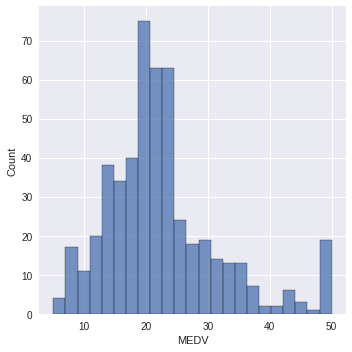

In [ ]:
#목표 변수인 'MEDV' 데이터의 분포 확인
sns.displot(x='MEDV',kind='hist',data=df)
plt.show() #20을 중심으로 정규분포의 형태를 띄고 최대값 50에 많은 데이터가 분포 됨

In [ ]:
#최소값
print(df['MEDV'].min())
#최댓값
print(df['MEDV'].max())
#중앙값
df['MEDV'].mean()

5.0
50.0


22.532806324110698

주택가격 (`MEDV`)과 관련 있는 Factor를 찾아보세요
1.   TOP4: 하위계층비율, 방의 수, 학생-교사비율, 비소매상업지역면적비율

2.   결과

      집값 상승과 상관관계 best:RM
      
      집값 하락과 상관관계 best:LSTAT


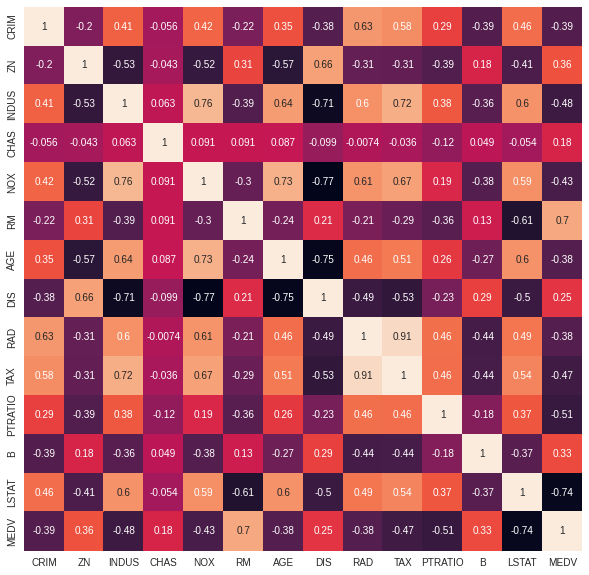

In [ ]:
#많은 요인 변수들 중에 'MEDV'와 가장 상관관계가 높은 변수를 알아보기 위해 heatmap 사용
df_corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(df_corr,annot=True,cbar=False) #annot:상관계수를 보여줄지 여부, cbar:오른쪽 컬러막대 출력 여부
plt.show() 

In [ ]:
#'LSTAT'까지 'MEDV'와 상관계수의 절대값 기준 큰 수 순으로 
corr_order = df.corr().loc[:'LSTAT', 'MEDV'].abs().sort_values(ascending=False)
corr_order # 하위계층비율, 방의 수, 학생-교사비율, 비소매상업지역면적비율 과의 상관관계를 집중적으로 분석해 보자

LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
NOX        0.427321
CRIM       0.388305
RAD        0.381626
AGE        0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
Name: MEDV, dtype: float64

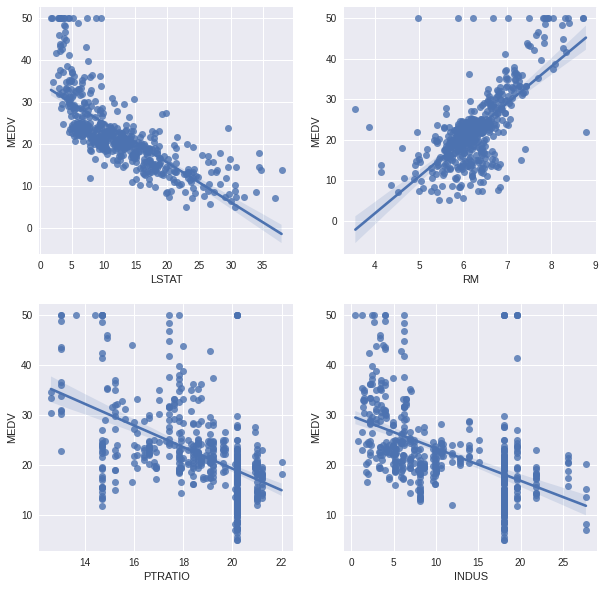

In [ ]:
plot_cols = ['MEDV','LSTAT','RM','PTRATIO','INDUS'] #top 4위까지 col 이름
plot_df = df.loc[:,plot_cols] #col 이름 해당 데이터
plt.figure(figsize=(10,10)) 
for idx,col in enumerate(plot_cols[1:]): #enumerate 함수로 (idx , col) 세트 만들어주기 ex) 0 LSTAT
  ax1 = plt.subplot(2,2,idx+1) #4등분 해줘야 함, 그다음은 idx 순으로 그래프 그리기
  sns.regplot(x=col, y=plot_cols[0], data=plot_df, ax=ax1) #plot_cols[0]:MEDV 기준으로 선형 회귀선 그리기
plt.show() # LSTAT 와 RM의 선형관계 뚜렷
#집값 상승과 상관관계 best:RM
#집값 하락과 상관관계 best:LSTAT

질문에 대한 답변
- 대형 평수 vs 소형 평수
  
  0.0이상인 수를 다 합쳐도 0.0에 해당하는 거주지역의 수가 훨씬 많다
  
  방크기와 집값의 상관관계는 작다.

In [ ]:
#유일한 평수 크기에 대한 데이터인 ZN(25000평방피트를 초과하는 거주지역의 비율) 로 대형평수 vs 소형평수 비교를 해보자
# small 과 big으로 나눠서 비교해보기 위해 df_space를 따로 만들어 주자
df_space = df.loc[:,['ZN','MEDV']]
df_space.head(10)

,ZN,MEDV
0,18.0,24.0
1,0.0,21.6
2,0.0,34.7
3,0.0,33.4
4,0.0,36.2
5,0.0,28.7
6,12.5,22.9
7,12.5,27.1
8,12.5,16.5
9,12.5,18.9


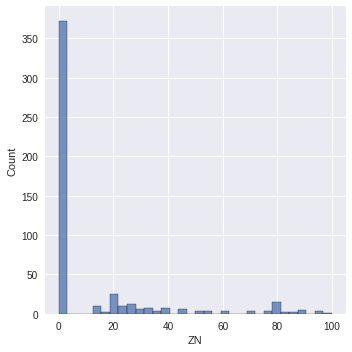

In [ ]:
sns.displot(x='ZN',kind='hist',data=df)
plt.show() 

In [ ]:
#그래프에 따라 대형평수와 소형평수를 나누는 기준을 25000평방 초과 여부로 세워도 된다고 봄
#소형평수:비율이 0인 거주지역의 수, 대형평수:비율이 있는 거주지역의 수
df_space['small_vs_big'] = ['small' if n == 0.0 else 'big' for n in df_space['ZN']]
df_space.head(3)

,ZN,MEDV,small_vs_big
0,18.0,24.0,big
1,0.0,21.6,small
2,0.0,34.7,small


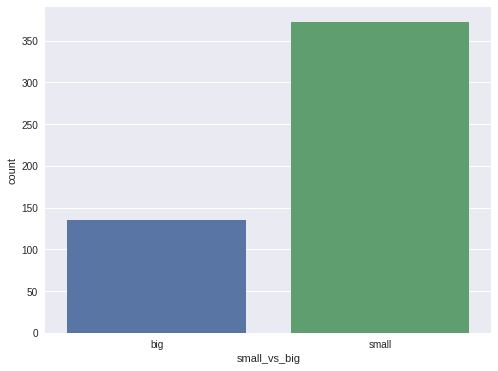

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(data=df_space, x='small_vs_big')
plt.show() # 0.0이상인 수를 다 합쳐도 0.0에 해당하는 거주지역의 수가 훨씬 많다

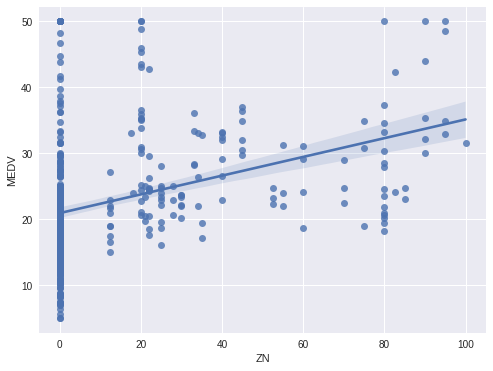

In [ ]:
plt.figure(figsize=(8,6))
sns.regplot(x='ZN', y='MEDV', data=df_space)
plt.show() # 방크기와 집값의 상관관계는 크게 없어 보인다.

- 노후화 정도와 집값의 관계는?
  
  노후화의 기준을 1940년 이전에 건축된 것으로 삼았다.
  
  보스턴의 다수의 주택이 노후화 된 것을 알 수 있다.
  
  적은 상관관계지만 오래될 수록 집값이 싼 상관관계를 보인다.
  

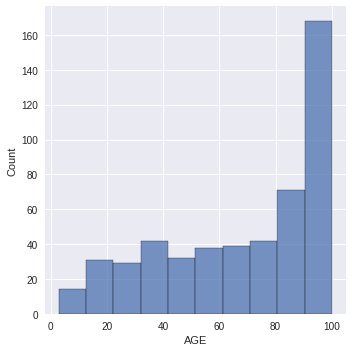

In [ ]:
#AGE 데이터의 분포도를 확인해 보자
sns.displot(x='AGE',kind='hist',data=df)
plt.show() 
#오른쪽으로 치우친 것을 확인 할 수 있다.
#보스턴의 다수의 주택이 노후화 된 것을 알 수 있다.

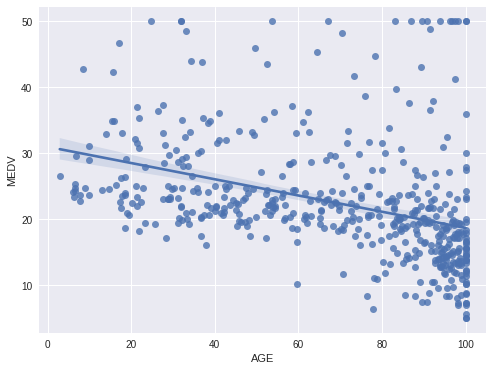

In [ ]:
plt.figure(figsize=(8,6))
sns.regplot(x='AGE', y='MEDV', data=df)
plt.show() #적은 상관관계지만 오래될 수록 집값이 싼 상관관계를 보인다.

- 직주근접?
  
  접근성 지수의 정의에 따라 클 수록 직장과 가까운 것임

  대부분의 집들이 직장과 먼 곳에 위치

  미미한 상관관계이긴 하나 직장과 가까운 주거지 일 수록 집값이 비쌈


In [ ]:
#'DIS'(직업센터까지의 접근성 지수)로 직주 근접에 대한 분석을 해보자
# 먼저 데이터 column 들을 확인하여 대략적인 느낌 확인
# 접근성 지수의 정의에 따라 클 수록 직장과 가까운 것임
df_center = df.loc[:,['DIS','MEDV']]
df_center.head(10)

,DIS,MEDV
0,4.0900,24.0
1,4.9671,21.6
2,4.9671,34.7
3,6.0622,33.4
4,6.0622,36.2
5,6.0622,28.7
6,5.5605,22.9
7,5.9505,27.1
8,6.0821,16.5
9,6.5921,18.9


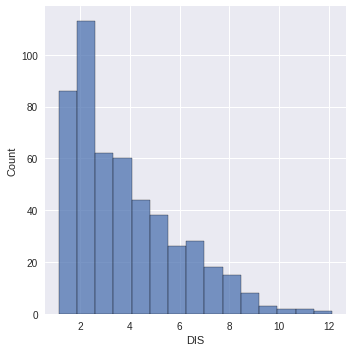

In [ ]:
# 데이터의 분포 확인
#왼쪽으로 치우쳐져 있는 것 확인 : 대부분의 집들이 직장과 먼 곳에 위치
sns.displot(x='DIS',kind='hist',data=df)
plt.show() 

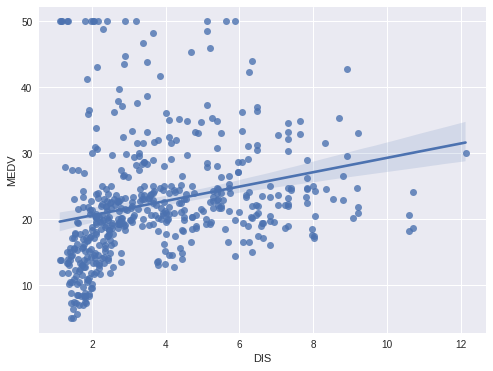

In [ ]:
plt.figure(figsize=(8,6))
sns.regplot(x='DIS', y='MEDV', data=df)
plt.show() #미미한 상관관계이긴 하나 직장과 가까운 주거지 일 수록 집값이 비쌈

- 찰스강뷰?
  
  집값과는 상관관계가 거의 없음

  찰스강 경계에 대부분의 집 위치


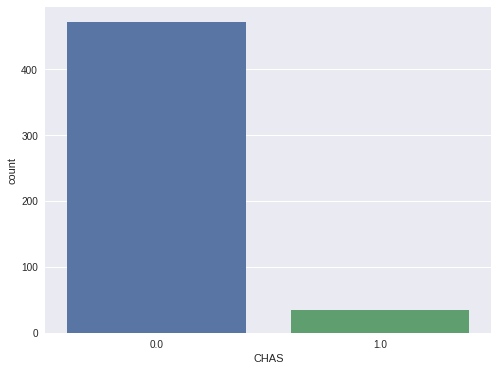

In [ ]:
#'CHAS'(찰스강의 경계에 위치한 경우1, 아니면 0) 데이터로 분석
# 이미 설명에서 데이터가 0 아니면 1 이라고 했으므로 데이터 colum 확인 생략
#0 과 1의 수만 파악 -> 0이 압도적으로 많음: 찰스강 경계에 대부분의 집 위치
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='CHAS')
plt.show()

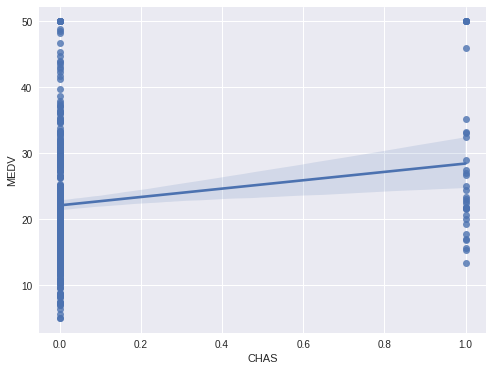

In [ ]:
plt.figure(figsize=(8,6))
sns.regplot(x='CHAS', y='MEDV', data=df)
plt.show() #집값과는 상관관계가 거의 없음

- 직장이 가까우면서 소형 평수인 부동산의 가격은?

In [ ]:
#직장이 가깝고 (기준 6 초가) 소형(위에서 구분해 놓은 small 사용)인 칼럼의 부동산 가격데이터 
df_price = df.loc[:,['DIS','ZN','MEDV']]
df_price = df_price[(df['DIS']>6)&(df_space['small_vs_big']=='small')]
df_price.head(10)

,DIS,ZN,MEDV
3,6.0622,0.0,33.4
4,6.0622,0.0,36.2
5,6.0622,0.0,28.7
49,6.0877,0.0,19.4
297,6.3200,0.0,20.3
333,6.4584,0.0,22.2
334,6.4584,0.0,20.7
342,6.2669,0.0,16.5
345,8.0136,0.0,17.5
346,8.0136,0.0,17.2


In [ ]:
# medv 중앙값 기준으로 cheap 와 expensive 나눔
df_price['c_e'] = ['c' if n < 22 else 'e' for n in df_price['MEDV']]
df_price.head(3)

,DIS,ZN,MEDV,s_b,c_e
3,6.0622,0.0,33.4,b,e
4,6.0622,0.0,36.2,b,e
5,6.0622,0.0,28.7,b,e


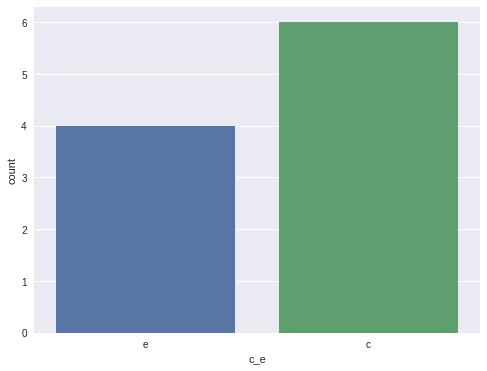

In [ ]:
# 직장이 가깝고 소형인 컬럼 중에 싼집이 훨씬 많은 것을 알 수 있음
plt.figure(figsize=(8,6))
sns.countplot(data=df_price, x='c_e')
plt.show()

<div class="alert alert-block alert-success">
<b>채점기준</b> <br>
<ul>
    <li>데이터를 3건이 상의 변수를 분석했는가? </li>
    <li>데이터를 분류한 기준을 논리적으로 정리했는가</li>       
    <li>데이터를 차트로 시각화했는가? </li>
    <li>결과를 분석해서 정리했는가? </li>       
    <li>심도있게 분석했는가? </li>     
</div>